![Ironhack logo](https://i.imgur.com/1QgrNNw.png)

# SHARK ATTACK

## Hipótese e Pergunta:
- Homens surfistas de 20 a 30 anos são os que possuem maiores possibilidades de sofrerem ataques de tubarão
- Qual mês que tem mais ataque de tubarão? (tubarão ataca mais na água quente ou em meses quentes tem mais gente na água e logo mais ataques de tubarão?

In [ ]:
import pandas as pd
import numpy as np
import re
!pip install seaborn
import seaborn as sns


In [2]:
df=pd.read_csv('attacks.csv', sep=',', index_col = 0, encoding='latin-1')

In [3]:
df_bkp = df.copy()

## Analisando os dados da planilha:

<AxesSubplot:ylabel='Case Number'>

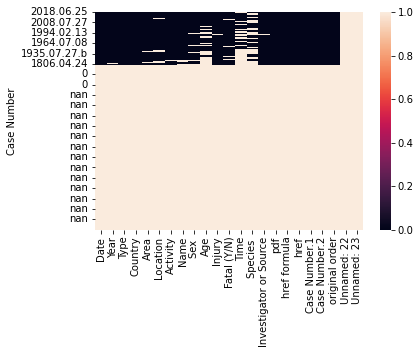

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
Case Number,,,,,,,,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
df.shape

(25723, 23)

In [7]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25723 entries, 2018.06.25 to xx
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6302 non-null   object 
 1   Year                    6300 non-null   float64
 2   Type                    6298 non-null   object 
 3   Country                 6252 non-null   object 
 4   Area                    5847 non-null   object 
 5   Location                5762 non-null   object 
 6   Activity                5758 non-null   object 
 7   Name                    6092 non-null   object 
 8   Sex                     5737 non-null   object 
 9   Age                     3471 non-null   object 
 10  Injury                  6274 non-null   object 
 11  Fatal (Y/N)             5763 non-null   object 
 12  Time                    2948 non-null   object 
 13  Species                 3464 non-null   object 
 14  Investigator or Source  6285 non-null

### Let's drop columns 21 and 22 with only one non-null element

In [9]:
df=df.drop(columns=['Unnamed: 22', 'Unnamed: 23'])

### 'Fixing' some columns

In [10]:
countrygrp = df.groupby(['Country'])

In [11]:
countrygrp.get_group('USA')

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Case Number,,,,,,,,,,,,,,,,,,,,,
2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,...,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0
2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,...,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ND.0056,Before 1958,0.0,Unprovoked,USA,Florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,...,N,NaN,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",ND-0056-HortonChase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0056,ND.0056,54.0
ND.0019,Before 1921,0.0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,NaN,...,N,NaN,NaN,"T. Helm, p.219",ND-0019-Kelley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0019,ND.0019,20.0
ND.0014,Before 17-Jul-1916,0.0,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,...,N,NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",ND-0014-pre1916-NorthCarolina.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0014,ND.0014,15.0


In [12]:
countrygrp['Activity'].value_counts().head(20)

Country                     Activity                                                                                                                                  
 PHILIPPINES                USS Hoel DD 533 sunk on 10/24/1944 in the Battle off Samar. 2 crewmen were swimmng alongside a floater net &                                  1
 TONGA                      Five men on makeshift raft after their 10 m fishing boat  capsized and sank in rough seas. Survivors rescued after  7.5 hours in the water    2
                            Scuba diving                                                                                                                                  1
AFRICA                      Jumped into river                                                                                                                             1
ALGERIA                     Swimming                                                                                                             

In [15]:
df=df[df.Age.astype(str).str.isdigit()]

In [16]:
df['Age'] = df.Age.astype('int')

C:\Users\carol\AppData\Local\Temp/ipykernel_56720/3658655638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.Age.astype('int')


In [17]:
df.Activity.isna().sum()

132

In [18]:
df.Age.dtypes

dtype('int32')

In [19]:
df = df.reset_index(drop=True)

In [20]:
df.shape

(3363, 21)

In [21]:
df.Age.unique()

array([57, 11, 48, 18, 52, 15, 12, 32, 10, 21, 34, 30, 60, 33, 29, 54, 41,
       37, 56, 19, 25, 69, 38, 55, 35, 46, 45, 14, 28, 20, 24, 26, 49, 22,
        7, 31, 17, 40, 13, 42,  3,  8, 50, 16, 82, 73, 68, 51, 39, 58, 47,
       61, 65, 36, 66, 43,  9, 72, 59,  6, 27, 64, 23, 71, 44, 62, 63, 70,
       53, 77, 74,  5, 86, 84, 75, 87, 67,  1, 81, 78])

In [22]:
df['Age'].describe()

count    3363.000000
mean       27.345822
std        13.890311
min         1.000000
25%        17.000000
50%        24.000000
75%        35.000000
max        87.000000
Name: Age, dtype: float64

SEX COLUMN

In [23]:
df.rename(columns={'Sex ':'sex'}, inplace=True)

In [24]:
df['sex'] = df['sex'].replace(['lli'], 'M')
df['sex'] = df['sex'].replace(['M '], 'M')

#### Function to show the month

In [25]:
def find_month(string):
    months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    try:
        for month in months:
            if re.search(month,string):
                return month
    except TypeError:
        return 'Unknown'

In [26]:
month = [(find_month(date)) for date in df.Date]
print (month)

['Jun', 'Jun', 'Jun', 'Jun', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Mar', 'Mar', 'Mar', 'Mar', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Feb', 'Jan', 'Jan', 'Jan', 'Dec', 'Dec', 'Dec', 'Dec', 'Nov', 'Nov', 'Nov', 'Nov', 'Nov', 'Nov', 'Nov', 'Oct', 'Oct', 'Oct', 'Oct', 'Oct', 'Oct', 'Oct', 'Oct', 'Sep', 'Sep', 'Sep', 'Sep', 'Sep', 'Sep', 'Sep', 'Sep', 'Aug', 'Aug', 'Aug', 'Aug', 'Aug', 'Aug', 'Aug', 'Jul', 'Jul', 'Jul', 'Jul', 'Jul', 'Jul', 'Jul', 'Jul', 'Jul', 'Jul', 'Jul', 'Jun', 'Jun', 'Jun', 'Jun', 'Jun', 'Jun', 'Jun', 'Jun', 'May', 'May', 'May', 'May', 'May', 'May', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Apr', 'Mar', 'Mar', 'Mar', 'Mar', 'Feb', 'Feb', 'Feb', 'Feb', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Jan', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Dec', 'Nov', 'Nov', 'Oct', 'Oct', 'Oct', 'Oct', 'Oct', 'Oct', 'Oct', 'Oct'

In [27]:
df = df.assign(Month = month)

In [28]:
df.Month.value_counts()

Jul    411
Aug    358
Sep    316
Jun    286
Oct    275
Jan    267
Apr    258
Dec    254
Mar    225
May    224
Nov    222
Feb    196
Name: Month, dtype: int64

In [29]:
df = df[(df.Month =='Jan')| (df.Month =='Feb')| (df.Month =='Mar')| (df.Month =='Apr')| (df.Month =='May')| (df.Month =='Jun')| (df.Month =='Jul')| (df.Month =='Aug')| (df.Month =='Sep')| (df.Month =='Oct')| (df.Month =='Nov')| (df.Month =='Dec')]

In [30]:
df.Month.value_counts(normalize=True).sort_values(ascending=False)

Jul    0.124848
Aug    0.108748
Sep    0.095990
Jun    0.086877
Oct    0.083536
Jan    0.081106
Apr    0.078372
Dec    0.077157
Mar    0.068348
May    0.068044
Nov    0.067436
Feb    0.059538
Name: Month, dtype: float64

## Starting Analysis

In [31]:
countrygrp = df.groupby(['Country'])

In [35]:
df.groupby(['sex'])[['Age']].mean().sort_values(by=['Age'])

,Age
sex,
F,27.071429
M,27.570570


In [36]:
countrygrp = df.groupby(['Country'])

In [37]:
countrygrp['Age'].mean()

Country
 TONGA                        69.000000
ADMIRALTY ISLANDS             26.000000
AMERICAN SAMOA                25.666667
ANDAMAN / NICOBAR ISLANDAS    32.000000
ARGENTINA                     18.000000
                                ...    
VANUATU                       12.000000
VENEZUELA                     37.000000
VIETNAM                       46.600000
WESTERN SAMOA                 25.000000
YEMEN                         23.000000
Name: Age, Length: 127, dtype: float64

In [38]:
countrygrp['Age'].mean().loc['USA']

26.786795048143052

In [39]:
countrygrp['Age'].mean().loc['AUSTRALIA']

28.036127167630056

In [40]:
countrygrp['Age'].agg(['mean','median','count']).sort_values(by='count',ascending=False)

,mean,median,count
Country,,,
USA,26.786795,22.0,1454
AUSTRALIA,28.036127,24.5,692
SOUTH AFRICA,25.677054,23.0,353
BAHAMAS,36.454545,36.0,66
BRAZIL,24.206349,21.0,63
...,...,...,...
GRAND CAYMAN,57.000000,57.0,1
FRANCE,50.000000,50.0,1
FEDERATED STATES OF MICRONESIA,26.000000,26.0,1


In [41]:
countrygrp['Age'].agg(['mean','median']).loc['USA']

mean      26.786795
median    22.000000
Name: USA, dtype: float64

In [42]:
countrygrp['Month'].count().sort_values(ascending=False)

Country
USA                               1454
AUSTRALIA                          692
SOUTH AFRICA                       353
BAHAMAS                             66
BRAZIL                              63
                                  ... 
GRAND CAYMAN                         1
FRANCE                               1
FEDERATED STATES OF MICRONESIA       1
FALKLAND ISLANDS                     1
 TONGA                               1
Name: Month, Length: 127, dtype: int64

In [43]:
countrygrp['Activity'].value_counts().sort_values(ascending=False)

Country    Activity                      
USA        Surfing                           464
           Swimming                          208
AUSTRALIA  Surfing                           139
           Swimming                           99
USA        Wading                             91
                                            ... 
INDIA      Bathing in river                    1
           Fishing                             1
           Standing                            1
           Swimming                            1
YEMEN      Swimming at side of small boat      1
Name: Activity, Length: 1037, dtype: int64

In [44]:
df.Activity.value_counts(normalize=True).sort_values(ascending=False)

Surfing                                                                               0.239494
Swimming                                                                              0.169036
Spearfishing                                                                          0.066035
Wading                                                                                0.037599
Fishing                                                                               0.037283
                                                                                        ...   
Inebriated, woke from sleep and fell off deck into the water                          0.000316
Fishing, fell in water & swimming strongly to shore                                   0.000316
Floating, after falling or jumping off the Standard Oil tanker Frederick W. Weller    0.000316
Swimming after being washed overboard                                                 0.000316
Swimming/                                         

In [45]:
countrygrp['Month'].count().sort_values(ascending=False)

Country
USA                               1454
AUSTRALIA                          692
SOUTH AFRICA                       353
BAHAMAS                             66
BRAZIL                              63
                                  ... 
GRAND CAYMAN                         1
FRANCE                               1
FEDERATED STATES OF MICRONESIA       1
FALKLAND ISLANDS                     1
 TONGA                               1
Name: Month, Length: 127, dtype: int64

In [46]:
actgrp = df.groupby(['Activity'])

In [47]:
actgrp['Age'].mean().sort_values(ascending=False).loc['Surfing']

26.08047493403694

In [48]:
df2 = df.groupby(['Country']).agg(Attacks=('Country','count')).sort_values(by='Attacks', ascending=False)

In [49]:
df2['%'] = round((df2.Attacks/df2.Attacks.sum())*100,2)
df2

,Attacks,%
Country,,
USA,1454,44.29
AUSTRALIA,692,21.08
SOUTH AFRICA,353,10.75
BAHAMAS,66,2.01
BRAZIL,63,1.92
...,...,...
GRAND CAYMAN,1,0.03
FRANCE,1,0.03
FEDERATED STATES OF MICRONESIA,1,0.03


In [50]:
pd.options.display.min_rows = 100

In [51]:
df.groupby(['Country','Month']).agg(Attacks=('Country','count')).sort_values(by='Attacks', ascending=False)

Attacks
Country               Month         
USA                   Jul        246
                      Aug        217
                      Sep        189
                      Jun        178
                      Oct        153
                      Apr        112
                      May        111
AUSTRALIA             Jan        107
                      Dec        101
                      Feb         83
USA                   Nov         82
SOUTH AFRICA          Jan         70
AUSTRALIA             Nov         69
                      Mar         69
USA                   Mar         68
AUSTRALIA             Oct         61
                      Apr         57
SOUTH AFRICA          Dec         46
USA                   Dec         41
AUSTRALIA             Sep         37
SOUTH AFRICA          Feb         34
                      Mar         34
                      Jul         30
AUSTRALIA             Aug         29
USA                   Jan         29
AUSTRALIA             Jul         28
USA                   Feb         28
SOUTH AFRICA          Apr         27
AUSTRALIA             May         26
                      Jun         25
...                              ...
NORTH PACIFIC OCEAN   Oct          1
NORTH ATLANTIC OCEAN  Aug          1
MOZAMBIQUE            Feb          1
NIGERIA               Oct          1
GREECE                Sep          1
MOZAMBIQUE            Mar          1
                      Nov          1
                      Oct          1
                      Sep          1
GREECE                Jun          1
NEW BRITAIN           Dec          1
                      Oct          1
GREECE                Jul          1
NEW CALEDONIA         Dec          1
GREECE                Dec          1
NEW CALEDONIA         Jan          1
GRAND CAYMAN          Oct          1
NEW CALEDONIA         Oct          1
Fiji                  Mar          1
NEW GUINEA            Jan          1
NEW ZEALAND           Apr          1
Fiji                  Feb          1
FRENCH POLYNESIA      Sep          1
                      Nov          1
NEW ZEALAND           May          1
FRENCH POLYNESIA      Mar          1
NEW ZEALAND           Oct          1
FRENCH POLYNESIA      Jun          1
NICARAGUA             Dec          1
 TONGA                Jul          1

[414 rows x 1 columns]

In [52]:
df.groupby(['Country','Activity','Month']).agg(Attacks=('Country','count')).sort_values(by='Attacks', ascending=False)

Attacks
Country      Activity                                           Month         
USA          Surfing                                            Oct         78
                                                                Sep         77
                                                                Aug         54
             Swimming                                           Jul         48
             Surfing                                            Nov         45
                                                                Apr         44
                                                                Jul         42
             Swimming                                           Jun         36
                                                                Aug         35
             Surfing                                            May         32
                                                                Jun         31
                                                                Mar         24
             Swimming                                           Sep         22
AUSTRALIA    Swimming                                           Jan         21
                                                                Feb         21
USA          Wading                                             Jul         20
             Surfing                                            Dec         19
AUSTRALIA    Surfing                                            Oct         18
             Swimming                                           Dec         18
             Surfing                                            Mar         17
SOUTH AFRICA Surfing                                            Jul         17
USA          Swimming                                           May         17
                                                                Apr         17
SOUTH AFRICA Swimming                                           Jan         17
USA          Wading                                             Aug         15
SOUTH AFRICA Swimming                                           Dec         14
AUSTRALIA    Surfing                                            Dec         14
                                                                Apr         14
             Spearfishing                                       Dec         14
USA          Standing                                           Jul         14
...                                                                        ...
INDONESIA    Surfing                                            Jan          1
                                                                Apr          1
INDIA        Swimming or surfing                                Nov          1
             Swimming                                           Dec          1
             Standing                                           May          1
             Fishing                                            Feb          1
             Bathing in river                                   May          1
ITALY        Attempting to rescue an injured & beached shark    Jun          1
             Canoeing                                           Jul          1
             Diving                                             Mar          1
JAMAICA      Diving                                             Jun          1
JAPAN        Scuba diving for bivalves                          Apr          1
             Hookah diving for pen shells                       Mar          1
             Fishing for tuna                                   Nov          1
             Fishing for squid aboard the trawler Shikishima... Jul          1
JAMAICA      Swimming                                           May          1
             Standing                                           Mar          1
             Spearfishing                                       Mar          1
             Fishing                      

In [53]:
df.groupby(['Country','Month']).agg(Attacks=('Country','count'), Age=('Age','mean')).sort_values(by='Attacks', ascending=False)

Attacks        Age
Country               Month                    
USA                   Jul        246  25.719512
                      Aug        217  24.520737
                      Sep        189  26.878307
                      Jun        178  24.342697
                      Oct        153  28.300654
                      Apr        112  28.535714
                      May        111  27.702703
AUSTRALIA             Jan        107  25.074766
                      Dec        101  26.990099
                      Feb         83  29.192771
USA                   Nov         82  28.792683
SOUTH AFRICA          Jan         70  23.742857
AUSTRALIA             Nov         69  26.391304
                      Mar         69  26.536232
USA                   Mar         68  27.985294
AUSTRALIA             Oct         61  27.622951
                      Apr         57  27.543860
SOUTH AFRICA          Dec         46  21.847826
USA                   Dec         41  32.439024
AUSTRALIA             Sep         37  31.675676
SOUTH AFRICA          Feb         34  22.000000
                      Mar         34  31.529412
                      Jul         30  26.600000
AUSTRALIA             Aug         29  29.586207
USA                   Jan         29  30.517241
AUSTRALIA             Jul         28  31.821429
USA                   Feb         28  28.821429
SOUTH AFRICA          Apr         27  24.148148
AUSTRALIA             May         26  31.884615
                      Jun         25  36.480000
...                              ...        ...
NORTH PACIFIC OCEAN   Oct          1  20.000000
NORTH ATLANTIC OCEAN  Aug          1  15.000000
MOZAMBIQUE            Feb          1  24.000000
NIGERIA               Oct          1  38.000000
GREECE                Sep          1  17.000000
MOZAMBIQUE            Mar          1  28.000000
                      Nov          1  19.000000
                      Oct          1  35.000000
                      Sep          1  20.000000
GREECE                Jun          1  42.000000
NEW BRITAIN           Dec          1  22.000000
                      Oct          1  15.000000
GREECE                Jul          1  19.000000
NEW CALEDONIA         Dec          1  37.000000
GREECE                Dec          1  36.000000
NEW CALEDONIA         Jan          1  30.000000
GRAND CAYMAN          Oct          1  57.000000
NEW CALEDONIA         Oct          1  24.000000
Fiji                  Mar          1  45.000000
NEW GUINEA            Jan          1  30.000000
NEW ZEALAND           Apr          1  41.000000
Fiji                  Feb          1  22.000000
FRENCH POLYNESIA      Sep          1  36.000000
                      Nov          1  52.000000
NEW ZEALAND           May          1  39.000000
FRENCH POLYNESIA      Mar          1   9.000000
NEW ZEALAND           Oct          1  17.000000
FRENCH POLYNESIA      Jun          1  39.000000
NICARAGUA             Dec          1  30.000000
 TONGA                Jul          1  69.000000

[414 rows x 2 columns]

In [54]:
df.groupby(['Country','sex']).agg(Attacks=('Country','count'), Age=('Age','mean')).sort_values(by='Attacks', ascending=False)

,,Attacks,Age
Country,sex,,
USA,M,1178,26.999151
AUSTRALIA,M,627,28.121212
SOUTH AFRICA,M,339,25.772861
USA,F,266,26.187970
BRAZIL,M,60,23.950000
AUSTRALIA,F,58,27.603448
BAHAMAS,M,55,37.581818
NEW ZEALAND,M,40,28.200000
MEXICO,M,34,31.617647


In [55]:
df.groupby(['Country','Activity','sex']).agg(Attacks=('Country','count'), Age=('Age','mean')).sort_values(by='Attacks', ascending=False)

Attacks  \
Country          Activity                                           sex            
USA              Surfing                                            M        426   
                 Swimming                                           M        145   
AUSTRALIA        Surfing                                            M        132   
                 Swimming                                           M         87   
SOUTH AFRICA     Surfing                                            M         77   
USA              Swimming                                           F         63   
SOUTH AFRICA     Swimming                                           M         59   
USA              Wading                                             M         53   
AUSTRALIA        Spearfishing                                       M         50   
SOUTH AFRICA     Spearfishing                                       M         40   
USA              Wading                                             F         38   
                 Fishing                                            M         36   
                 Spearfishing                                       M         35   
                 Surfing                                            F         30   
                 Standing                                           M         29   
AUSTRALIA        Fishing                                            M         25   
                 Bathing                                            M         23   
BRAZIL           Swimming                                           M         20   
                 Surfing                                            M         20   
BAHAMAS          Spearfishing                                       M         19   
USA              Body boarding                                      M         18   
                 Standing                                           F         18   
SOUTH AFRICA     Treading water                                     M         18   
REUNION          Surfing                                            M         16   
USA              Body surfing                                       M         13   
                 Boogie boarding                                    M         13   
                 Snorkeling                                         M         13   
AUSTRALIA        Swimming                                           F         12   
USA              Scuba diving                                       M         12   
                 Snorkeling                                         F         11   
...                                                                          ...   
IRAN             Fishing, probably with a net                       M          1   
                 Bathing or washing                                 F          1   
GRENADA          Swimming                                           M          1   
FRENCH POLYNESIA Feeding fish                                       F          1   
                 Fishing, standing in 2' of water                   M          1   
                 Hand feeding sharks                                M          1   
                 Kite boarding                                      M          1   
                 Kitesurfing                                        M          1   
                 Scuba diving                                       M          1   
                 Surfing                                            M          1   
                 Swimming                                           M          1   
Fiji             Diving                                             M          1   
                 Diving for beche-de-mer                            M          1   
GRAND CAYMAN     Scuba diving                                       F          1   
GREECE           Spearfishing                                       M          1   
GUAM             Spearfishing            

In [56]:
df.groupby(['Country','Month','sex']).agg(Attacks=('Country','count'), Age=('Age','mean')).sort_values(by='Attacks', ascending=False).head(30)

Attacks        Age
Country      Month sex                    
USA          Jul   M        179  26.067039
             Aug   M        178  24.707865
             Sep   M        162  26.777778
             Jun   M        135  26.162963
             Oct   M        129  27.333333
             Apr   M         96  28.677083
AUSTRALIA    Jan   M         96  25.864583
             Dec   M         90  27.755556
USA          May   M         82  28.134146
AUSTRALIA    Feb   M         75  28.466667
             Nov   M         69  26.391304
USA          Nov   M         69  27.449275
SOUTH AFRICA Jan   M         68  23.794118
USA          Jul   F         66  24.848485
AUSTRALIA    Mar   M         61  25.639344
USA          Mar   M         58  28.413793
AUSTRALIA    Apr   M         53  27.566038
             Oct   M         49  27.612245
USA          Jun   F         42  18.714286
SOUTH AFRICA Dec   M         42  22.214286
USA          Dec   M         38  31.894737
             Aug   F         37  24.162162
AUSTRALIA    Sep   M         36  32.361111
SOUTH AFRICA Mar   M         34  31.529412
             Feb   M         32  22.343750
USA          May   F         29  26.482759
AUSTRALIA    Aug   M         28  29.892857
SOUTH AFRICA Jul   M         28  27.285714
USA          Jan   M         27  31.333333
AUSTRALIA    Jul   M         26  31.846154

In [57]:
df.groupby(['Activity','Country','Month','sex']).agg(Attacks=('Country','count'), Age=('Age','mean')).sort_values(by='Attacks', ascending=False).head(30)

Attacks        Age
Activity     Country      Month sex                    
Surfing      USA          Oct   M         75  25.853333
                          Sep   M         71  26.169014
                          Aug   M         48  21.854167
                          Nov   M         41  23.902439
                          Apr   M         40  28.100000
                          Jul   M         39  24.717949
                          May   M         30  27.933333
Swimming     USA          Aug   M         29  23.000000
                          Jul   M         28  25.285714
Surfing      USA          Jun   M         27  23.629630
Swimming     USA          Jun   M         27  25.444444
Surfing      USA          Mar   M         21  28.571429
Swimming     USA          Jul   F         20  21.050000
             AUSTRALIA    Feb   M         18  23.833333
                          Dec   M         18  28.333333
             USA          Sep   M         18  28.222222
Surfing      AUSTRALIA    Oct   M         17  26.411765
             USA          Dec   M         17  32.411765
Swimming     SOUTH AFRICA Jan   M         17  20.588235
             AUSTRALIA    Jan   M         16  25.375000
Surfing      AUSTRALIA    Mar   M         16  26.312500
             SOUTH AFRICA Jul   M         16  26.937500
Spearfishing AUSTRALIA    Dec   M         14  25.714286
Surfing      AUSTRALIA    Dec   M         13  35.846154
                          Apr   M         13  29.769231
Swimming     SOUTH AFRICA Dec   M         13  20.461538
Surfing      AUSTRALIA    Jul   M         13  32.692308
Wading       USA          Jul   F         12  24.666667
Surfing      AUSTRALIA    Feb   M         12  32.666667
                          Sep   M         12  29.833333